In [0]:
import cv2
import pandas as pd
import time
import numpy as np
import time
import os
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
drive.mount('/content/drive')
os.chdir("/content/drive/Shared drives/MotionAI/MotionAI Dataset/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Points Inference 
This section runs openspose on a selected image to get inference.

In [0]:
# Run this to test MPII. Download the 2 files from github
'''protoFile = "MPII Model/openpose_pose_mpi_faster_4_stages.prototxt"
weightsFile = "MPII Model/pose_iter_160000.caffemodel"
nPoints = 15
POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13]]'''

In [0]:
# Run this for COCO (giving better result). Download the two files from github
protoFile = "COCO Model/pose_deploy_linevec.prototxt"
weightsFile = "COCO Model/pose_iter_440000.caffemodel"
nPoints = 18
POSE_PAIRS = [[1,0],[1,2],[1,5],[2,3],[3,4],[5,6],[6,7],[1,8],[8,9],[9,10],[1,11],[11,12],[12,13],[0,14],[0,15],[14,16],[15,17]]

In [0]:
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

inWidth = 367
inHeight = 367

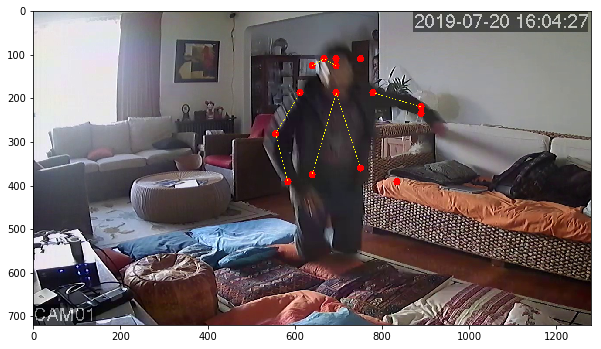

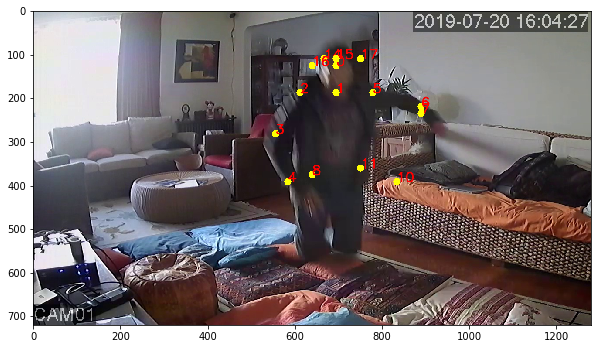

In [0]:
# Set image name and label
image_name = 'chute1_cam1.avi_frame278.jpg'
label ='Falling'

frame = cv2.imread('./'+label+'/'+image_name)

frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
frameCopy = np.copy(frame)
threshold = 0.1


inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output = net.forward()
H = output.shape[2]
W = output.shape[3]

points = []

for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H

    if prob > threshold : 
        cv2.circle(frameCopy, (int(x), int(y)), 8, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)
        cv2.circle(frame, (int(x), int(y)), 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)

# Draw Skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(frame, points[partA], points[partB], (0, 255, 255), 1)

plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))

In [0]:
point_map = ['Nose_x',
 'Nose_y',
 'Neck_x',
 'Neck_y',
 'Right Shoulder_x',
 'Right Shoulder_y',
 'Right Elbow_x',
 'Right Elbow_y',
 'Right Wrist_x',
 'Right Wrist_y',
 'Left Shoulder_x',
 'Left Shoulder_y',
 'Left Elbow_x',
 'Left Elbow_y',
 'Left Wrist_x',
 'Left Wrist_y',
 'Right Hip_x',
 'Right Hip_y',
 'Right Knee_x',
 'Right Knee_y',
 'Right Ankle_x',
 'Right Ankle_y',
 'Left Hip_x',
 'Left Hip_y',
 'Left Knee_x',
 'Left Knee_y',
 'LAnkle_x',
 'LAnkle_y',
 'Right Eye_x',
 'Right Eye_y',
 'Left Eye_x',
 'Left Eye_y',
 'Right Ear_x',
 'Right Ear_y',
 'Left Ear_x',
 'Left Ear_y']

### Run This!
This section extracts points for all images in folder into a csv.

In [0]:
protoFile = "COCO Model/pose_deploy_linevec.prototxt"
weightsFile = "COCO Model/pose_iter_440000.caffemodel"
nPoints = 18
POSE_PAIRS = [[1,0],[1,2],[1,5],[2,3],[3,4],[5,6],[6,7],[1,8],[8,9],[9,10],[1,11],[11,12],[12,13],[0,14],[0,15],[14,16],[15,17]]

In [0]:
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

inWidth = 367
inHeight = 367

In [0]:
# Return chute num, cam num, frame num, points, label (label is folder name)
def point_extractor(image_name, label):
  
  frame = cv2.imread(label+"/"+image_name)
  frameWidth = frame.shape[1]
  frameHeight = frame.shape[0]
  threshold = 0.2
  
  
  inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

  net.setInput(inpBlob)

  output = net.forward()
  H = output.shape[2]
  W = output.shape[3]
  
  points = []
  
  for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H

    if prob > threshold : 

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)

  return [image_name.split('_')[0], image_name.split('_')[1], image_name.split('_')[2], points, label]

In [0]:
df = pd.DataFrame(columns=('Chute Num', 'Cam Num', 'Frame Num', 'Points', 'Label'))
fall_images = os.listdir("./Falling")

start_time = time.time()

for each in fall_images:
  df.loc[each] = point_extractor(each, 'Falling')
  print(each)
  
print("--- %s seconds ---" % (time.time() - start_time))

df.to_csv("Falling.csv")

chute3_cam4.avi_frame445.jpg
chute3_cam4.avi_frame446.jpg
chute3_cam4.avi_frame447.jpg
chute3_cam4.avi_frame448.jpg
chute3_cam4.avi_frame449.jpg
--- 41.997472524642944 seconds ---


In [0]:
df = pd.DataFrame(columns=('Chute Num', 'Cam Num', 'Frame Num', 'Points', 'Label'))
walk_images = os.listdir("./Walking")

start_time = time.time()

for each in walk_images:
  df.loc[each] = point_extractor(each, 'Walking')
  print(each)
  
print("--- %s seconds ---" % (time.time() - start_time))

df.to_csv("Walking.csv")